Import necessities

In [7]:
import tensorflow as tf
from keras.layers import Dense, Reshape, Conv2D, Flatten, Input
from keras.models import Model, Sequential
from keras.optimizers import Adam
import numpy as np


This section is specific to google colab
I switched to using my personal device so this is not needed

In [8]:
#Use google colab gpu
tf.test.gpu_device_name()


''

In [9]:
#connect google drive
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd /content/gdrive/My Drive/Humans

/content/gdrive/My Drive/Humans


In [ ]:
# !tar -zxvf lfw.tgz #ONLY RUN ONCE

In [ ]:
%cd lfw

/content/gdrive/My Drive/Humans/lfw


Faces found at http://vis-www.cs.umass.edu/lfw/

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator



# Create an ImageDataGenerator for preprocessing and data loading
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
)

# Create a generator for loading and preprocessing the images
batch_size = 8
image_generator = datagen.flow_from_directory(
    "lfw",
    target_size=(250, 250),  # Adjust the size as needed
    batch_size=batch_size,
    class_mode=None,  # Set to None for GAN training
    shuffle=True  # Shuffle the dataset
)


Found 13233 images belonging to 5749 classes.


In [ ]:

# Generator model
generator = Sequential([
  Dense(250 * 250 * 3, activation='sigmoid', input_shape=(100,)),
Reshape((250, 250, 3))
])
generator.summary()

generator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 187500)            18937500  
                                                                 
 reshape (Reshape)           (None, 250, 250, 3)       0         
                                                                 
Total params: 18937500 (72.24 MB)
Trainable params: 18937500 (72.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Discriminator model
discriminator = Sequential([
    Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(250, 250, 3), activation='relu'),
    Conv2D(128, (4, 4), strides=(2, 2), padding='same', activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [ ]:
# Combine the generator and discriminator into a GAN
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)

# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [ ]:
limit = 0
for batch in image_generator:
    limit += len(batch)
    if(limit >= 3000):
        break

KeyboardInterrupt: 

In [10]:


limit = 0
num_epochs = 1  # Adjust the number of epochs as needed

for epoch in range(num_epochs):
    for batch in image_generator:
        limit += len(batch)
        if(limit >= 5000):
            break
        # Train the discriminator on real images
        real_images = batch
        batch_size = real_images.shape[0]
        real_labels = np.ones((batch_size, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        # Generate fake images and train the discriminator on them
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)
        batch_size = fake_images.shape[0]
        fake_labels = np.zeros((batch_size, 1))
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        print(f"Epoch {epoch}/{num_epochs}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")





1/1 [==============================] - 0s 37ms/step
Epoch 0/1, D Loss Real: [0.0, 1.0], D Loss Fake: [0.006541870534420013, 1.0], G Loss: 4.974782943725586
1/1 [==============================] - 0s 36ms/step
Epoch 0/1, D Loss Real: [7.203468408251425e-31, 1.0], D Loss Fake: [0.12228274345397949, 0.875], G Loss: 5.659093856811523
1/1 [==============================] - 0s 39ms/step
Epoch 0/1, D Loss Real: [5.69741386975587e-38, 1.0], D Loss Fake: [0.00582377053797245, 1.0], G Loss: 5.643369197845459
1/1 [==============================] - 0s 38ms/step
Epoch 0/1, D Loss Real: [0.0, 1.0], D Loss Fake: [0.018076589331030846, 1.0], G Loss: 5.653359889984131
1/1 [==============================] - 0s 120ms/step
Epoch 0/1, D Loss Real: [3.337343969178619e-06, 1.0], D Loss Fake: [0.003121698275208473, 1.0], G Loss: 5.193187713623047
1/1 [==============================] - 0s 38ms/step
Epoch 0/1, D Loss Real: [0.0, 1.0], D Loss Fake: [0.0028888583183288574, 1.0], G Loss: 6.084156036376953
1/1 [====

In [45]:
#export trained model


discriminator.save("deepfake_detector.h5")

C:\Users\CS HONS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
generator.save("deepfake_generator.h5")

In [47]:
gan.save("deepfake_gan.h5")

C:\Users\CS HONS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Download trained model
from google.colab import files

files.download('deepfake_detector.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import tensorflow as tf
import numpy as np


model = tf.keras.models.load_model('deepfake_detector.h5')


def detect_deeepfake(image):
    try:
        image = np.array(image)
        prediction = model.predict(np.expand_dims(image, axis=0))

        return prediction
    except Exception as e:
        return e

In [49]:
import cv2
from mtcnn import MTCNN

def preprocess_image(image_path):
    try:
        detector = MTCNN()

        image = cv2.imread(image_path)
        faces = detector.detect_faces(image)

        if len(faces) == 0:
            raise Exception('no face')
        
        x,y,w,h = faces[0]['box']

        cropped_image = image[y:y+h, x:x+w]

        resized_image = cv2.resize(cropped_image, (250, 250))

        return resized_image
    
    except Exception as e:
        raise e

In [50]:
print(detect_deeepfake(preprocess_image("face1.jpg"))[0][0])

1/1 [==============================] - 0s 83ms/step
0.0


In [11]:
noise = np.random.normal(0, 1, (1, 100))
fake_images = generator.predict(noise)
print(fake_images)

1/1 [==============================] - 0s 43ms/step
[[[[0.529843   0.3310535  0.27300343]
   [0.44955987 0.40834883 0.26625848]
   [0.5532506  0.30701363 0.27485985]
   ...
   [0.5202704  0.15856577 0.30774105]
   [0.42639732 0.35941407 0.42285365]
   [0.38295418 0.30332655 0.40601292]]

  [[0.45880777 0.252305   0.30217463]
   [0.6034927  0.199917   0.34195015]
   [0.59305257 0.4180143  0.27432704]
   ...
   [0.6637036  0.26193488 0.37985644]
   [0.61358416 0.22423726 0.37508142]
   [0.51384497 0.47035518 0.53332883]]

  [[0.40277416 0.4334746  0.16836198]
   [0.5205008  0.53655326 0.27486846]
   [0.6724187  0.48013756 0.22806163]
   ...
   [0.6962068  0.48538727 0.36034623]
   [0.5634     0.4363582  0.5554121 ]
   [0.44110185 0.66043365 0.5758843 ]]

  ...

  [[0.66868013 0.57226866 0.43803486]
   [0.4664705  0.5611137  0.4920712 ]
   [0.3862835  0.40765917 0.3988255 ]
   ...
   [0.44114175 0.4262021  0.48150313]
   [0.3778304  0.6263693  0.36574128]
   [0.54003006 0.38734764 0.46260

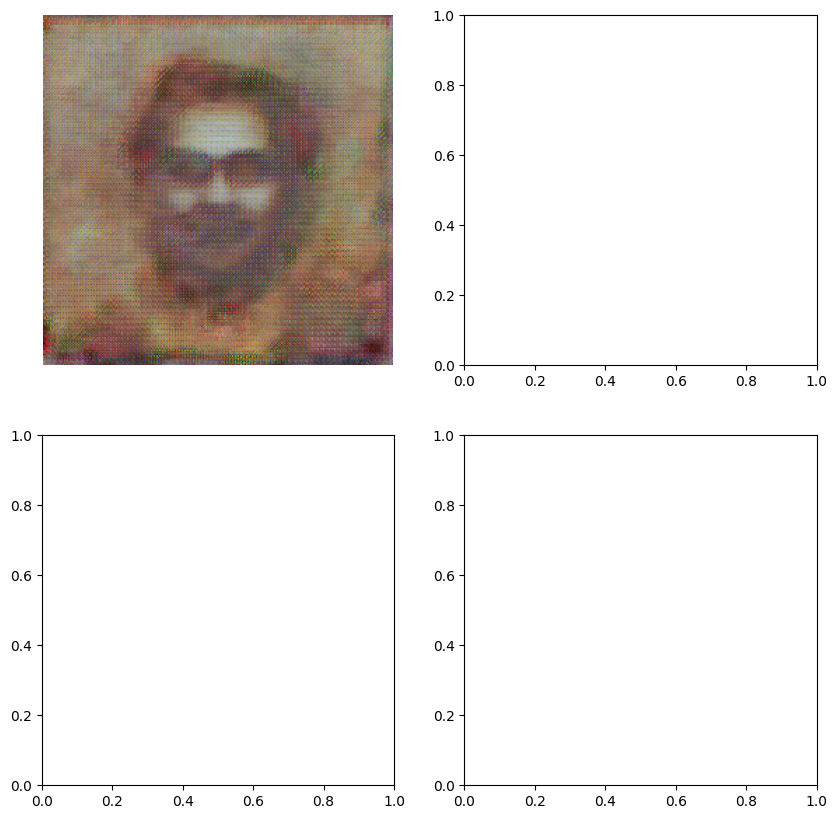

In [12]:
import matplotlib.pyplot as plt

# Determine the number of images to display
num_images = fake_images.shape[0]  # Use the number of images in 'fake_images'

# Define the number of rows and columns for displaying images in a grid
rows, cols = 2, 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Loop through and display the images
ax = axes[0 // cols, 0 % cols]  # Calculate row and column based on 'i'
ax.imshow(fake_images[0])
ax.axis('off')

# Show the figure
plt.show()
